In [2]:
# # 코랩에서 한글 폰트를 사용하기 위한 과정

# # 1. 아래코드 실행하여 폰트 다운
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

# # 2. 코랩의 런타임 다시시작(상단Bar에 '런타임' - '런타임 다시 시작')
# # 3. 런타임 다시시작 완료했으면, 아래코드 실행

In [3]:
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import pandas as pd

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

sns.set(font='NanumBarunGothic', font_scale=2.5)
# sns.set(font='Malgun Gothic', font_scale=2.5)
plt.rcParams['axes.unicode_minus'] = False

##### 데이터 불러오기

In [4]:
app = pd.read_csv('application_data.csv')
print(app.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB
None


findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.


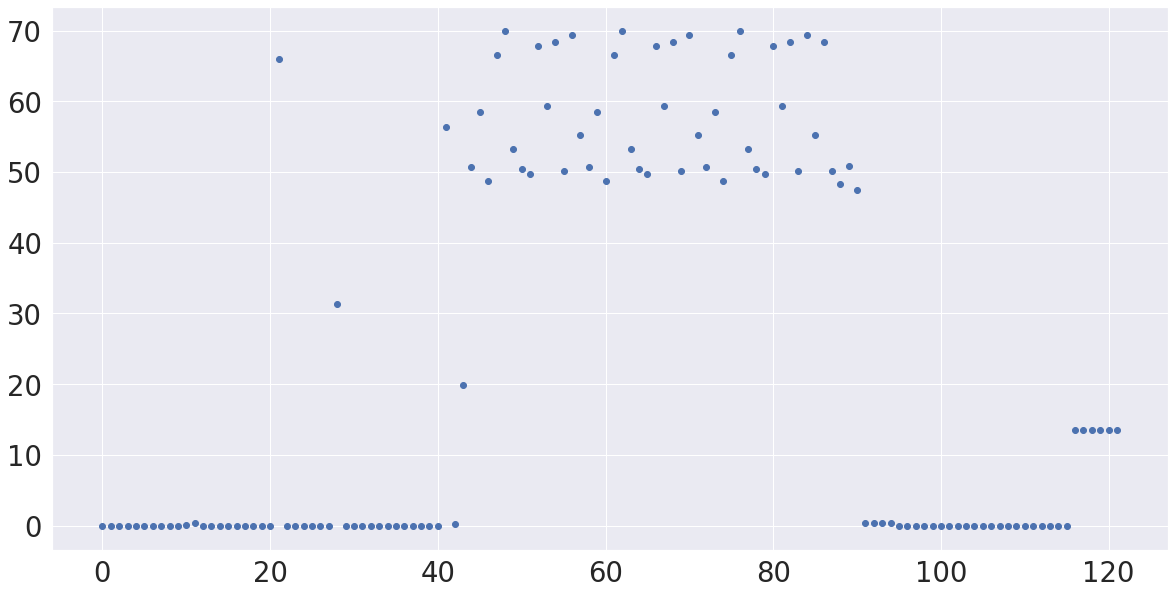

In [5]:
# 컬럼별 결측치 비율 확인
app_isna = (app.isna().sum()/len(app)*100)

plt.figure(figsize=(20,10))
plt.scatter(range(len(app_isna)), app_isna.values)
plt.show()

In [6]:
# 결측치가 40% 이상인 컬럼 제거
nan_app = app.loc[:, app.isna().sum()/len(app)*100<40]
nan_app_isna = pd.DataFrame(nan_app.isna().sum()/len(app)*100, columns=['nan_per'])
nan_app_isna['dtype'] = [nan_app[i].dtype for i in nan_app_isna.index]
nan_app_isna.sort_values('nan_per')[nan_app_isna['nan_per']>0] # 결측치가 존재하는 컬럼만 확인

,nan_per,dtype
DAYS_LAST_PHONE_CHANGE,0.000325,float64
CNT_FAM_MEMBERS,0.000650,float64
AMT_ANNUITY,0.003902,float64
AMT_GOODS_PRICE,0.090403,float64
EXT_SOURCE_2,0.214626,float64
DEF_60_CNT_SOCIAL_CIRCLE,0.332021,float64
OBS_60_CNT_SOCIAL_CIRCLE,0.332021,float64
DEF_30_CNT_SOCIAL_CIRCLE,0.332021,float64
OBS_30_CNT_SOCIAL_CIRCLE,0.332021,float64
NAME_TYPE_SUITE,0.420148,object


In [7]:
# 결측치가 존재하는 범주형 특성 확인
print(nan_app['OCCUPATION_TYPE'].value_counts())
print('-'*100)
print(nan_app['NAME_TYPE_SUITE'].value_counts())

Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: OCCUPATION_TYPE, dtype: int64
----------------------------------------------------------------------------------------------------
Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64


In [8]:
# 범주형 특성 결측치 처리
nan_app['OCCUPATION_TYPE'] = nan_app['OCCUPATION_TYPE'].fillna('In occupation')
nan_app['NAME_TYPE_SUITE'] = nan_app['NAME_TYPE_SUITE'].fillna('Unaccompanied')
# 수치형은 추후에 IterativeImputer로 처리할 예정

In [10]:
# previous_application.csv 데이터 셋에서 'NAME_CONTRACT_STATUS' 컬럼 불러오기
pre = pd.read_csv('previous_application.csv')
pre_groupby = pd.get_dummies(pre[['SK_ID_CURR', 'NAME_CONTRACT_STATUS']]).groupby(['SK_ID_CURR']).sum()
pre_groupby

,NAME_CONTRACT_STATUS_Approved,NAME_CONTRACT_STATUS_Canceled,NAME_CONTRACT_STATUS_Refused,NAME_CONTRACT_STATUS_Unused offer
SK_ID_CURR,,,,
100001,1,0,0,0
100002,1,0,0,0
100003,3,0,0,0
100004,1,0,0,0
100005,1,1,0,0
...,...,...,...,...
456251,1,0,0,0
456252,1,0,0,0
456253,2,0,0,0


In [11]:
# previous_application와 application merge 하기
app_pre_merge = nan_app.merge(pre_groupby.reset_index(), how='left', on='SK_ID_CURR')
app_pre_merge.iloc[:, -4:] = app_pre_merge.iloc[:, -4:].fillna(0)
app_pre_merge.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 0 to 307510
Data columns (total 77 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   SK_ID_CURR                         307511 non-null  int64  
 1   TARGET                             307511 non-null  int64  
 2   NAME_CONTRACT_TYPE                 307511 non-null  object 
 3   CODE_GENDER                        307511 non-null  object 
 4   FLAG_OWN_CAR                       307511 non-null  object 
 5   FLAG_OWN_REALTY                    307511 non-null  object 
 6   CNT_CHILDREN                       307511 non-null  int64  
 7   AMT_INCOME_TOTAL                   307511 non-null  float64
 8   AMT_CREDIT                         307511 non-null  float64
 9   AMT_ANNUITY                        307499 non-null  float64
 10  AMT_GOODS_PRICE                    307233 non-null  float64
 11  NAME_TYPE_SUITE                    3075

In [12]:
y = app_pre_merge[['SK_ID_CURR', 'TARGET']]
ori_X = app_pre_merge.drop(columns=['SK_ID_CURR', 'TARGET'])

In [19]:
# 수치형 특성 결측치 제거 -- 1시간 정도 소요

dum_X = pd.get_dummies(ori_X, drop_first=True) # 원-핫 인코딩

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scl_X = scaler.fit_transform(dum_X) # 스케일링
scl_X = pd.DataFrame(scl_X, columns=dum_X.columns)

import umap.umap_ as umap
scl_nan_X = scl_X.loc[:,scl_X.isna().sum()>0] # 결측치 있는 특성
scl_ok_X = scl_X.loc[:,scl_X.isna().sum()==0] # 결측치 없는 특성

reducer = umap.UMAP(n_components=30) # 30차원으로 축소
red_ok_X = reducer.fit_transform(scl_ok_X) # 결측치 없는 특성만 차원축소
red_ok_X = pd.DataFrame(red_ok_X)
red_X = pd.concat([scl_nan_X, red_ok_X], axis=1) # (결측치 있는 특성 + 결측치 없는 특성들의 차원축소된 특성)

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imputer = IterativeImputer(random_state=0) # default : BayesianRidge 모델 사용
imp_X = imputer.fit_transform(red_X) # 결측치 처리

In [20]:
# inverse scaling
_scl_X = scl_X.copy()
_scl_X.loc[:, _scl_X.isna().sum()>0] = imp_X[:, :scl_nan_X.shape[1]] # scl_X에 결측치 처리 완료된 값들 업데이트
inv_X = scaler.inverse_transform(_scl_X) # _scl_X 역변환
_ori_X = ori_X.copy()
_ori_X.loc[:, _ori_X.isna().sum()>0] = inv_X[:,:scl_nan_X.shape[1]] # ori_X에 결측치 처리 완료 후 역변환 된 값 업데이트

_ori_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 0 to 307510
Data columns (total 75 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   NAME_CONTRACT_TYPE                 307511 non-null  object 
 1   CODE_GENDER                        307511 non-null  object 
 2   FLAG_OWN_CAR                       307511 non-null  object 
 3   FLAG_OWN_REALTY                    307511 non-null  object 
 4   CNT_CHILDREN                       307511 non-null  int64  
 5   AMT_INCOME_TOTAL                   307511 non-null  float64
 6   AMT_CREDIT                         307511 non-null  float64
 7   AMT_ANNUITY                        307511 non-null  float64
 8   AMT_GOODS_PRICE                    307511 non-null  float64
 9   NAME_TYPE_SUITE                    307511 non-null  object 
 10  NAME_INCOME_TYPE                   307511 non-null  object 
 11  NAME_EDUCATION_TYPE                3075

In [21]:
num_X = _ori_X.loc[:, _ori_X.dtypes!='object']
obj_X = _ori_X.loc[:, _ori_X.dtypes=='object']

In [22]:
# 다중공선성 확인 

from sklearn.preprocessing import StandardScaler
scr = StandardScaler()
sc_num_X = scr.fit_transform(num_X) # 스케일링

from statsmodels.stats.outliers_influence import variance_inflation_factor
dfX = sc_num_X
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(dfX, i) for i in range(dfX.shape[1])]
vif["features"] = num_X.columns
vif_sort = vif.sort_values('VIF Factor', ascending=False)
vif_sort.T

,53,10,2,13,56,4,58,6,14,16,...,45,46,52,38,50,48,35,33,41,43
VIF Factor,1251982354.867499,321480319.152582,3339298.857254,3114072.834478,1240136.059853,330101.745388,281628.542911,253550.144942,203502.726358,153823.539005,...,1.014736,1.004158,1.00353,1.003039,1.002784,1.001651,1.000986,1.000849,1.000508,1.000092
features,AMT_REQ_CREDIT_BUREAU_HOUR,FLAG_MOBIL,AMT_CREDIT,FLAG_CONT_MOBILE,AMT_REQ_CREDIT_BUREAU_MON,AMT_GOODS_PRICE,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_BIRTH,FLAG_PHONE,CNT_FAM_MEMBERS,...,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_21,FLAG_DOCUMENT_7,FLAG_DOCUMENT_19,FLAG_DOCUMENT_17,FLAG_DOCUMENT_4,FLAG_DOCUMENT_2,FLAG_DOCUMENT_10,FLAG_DOCUMENT_12


In [24]:
# VIF 10 넘는 특성 확인
vif_sort[vif_sort['VIF Factor'] > 10].T

,53,10,2,13,56,4,58,6,14,16,...,0,31,32,57,8,12,5,27,17,18
VIF Factor,1251982354.867499,321480319.152582,3339298.857254,3114072.834478,1240136.059853,330101.745388,281628.542911,253550.144942,203502.726358,153823.539005,...,26283.667071,23666.465988,21300.360991,19130.046604,9508.113264,7473.19616,5223.858231,43.27128,10.76792,10.640703
features,AMT_REQ_CREDIT_BUREAU_HOUR,FLAG_MOBIL,AMT_CREDIT,FLAG_CONT_MOBILE,AMT_REQ_CREDIT_BUREAU_MON,AMT_GOODS_PRICE,AMT_REQ_CREDIT_BUREAU_YEAR,DAYS_BIRTH,FLAG_PHONE,CNT_FAM_MEMBERS,...,CNT_CHILDREN,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_QRT,DAYS_REGISTRATION,FLAG_WORK_PHONE,REGION_POPULATION_RELATIVE,EXT_SOURCE_3,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY


In [25]:
# VIF가 10 이상인 특성 제거
over_vif_cols = vif_sort[vif_sort['VIF Factor'] > 10]['features'].values # VIF가 10초과인 특성들
drop_num_X = num_X.drop(columns=over_vif_cols)

# 특성 제거후 다중공선성 재확인

from sklearn.preprocessing import StandardScaler
scr = StandardScaler()
sc_num_X = scr.fit_transform(drop_num_X) # 스케일링

from statsmodels.stats.outliers_influence import variance_inflation_factor
dfX = sc_num_X
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(dfX, i) for i in range(dfX.shape[1])]
vif["features"] = drop_num_X.columns
vif_sort = vif.sort_values('VIF Factor', ascending=False)
vif_sort.T

,2,5,3,6,9,1,4,14,12,30,...,20,27,21,13,25,23,10,8,16,18
VIF Factor,9.041173,7.412703,7.323658,6.005355,2.548111,2.428067,2.421854,1.795016,1.794717,1.204461,...,1.00563,1.002451,1.002412,1.001882,1.001678,1.001062,1.00084,1.000533,1.000445,1.000037
features,REG_REGION_NOT_WORK_REGION,REG_CITY_NOT_WORK_CITY,LIVE_REGION_NOT_WORK_REGION,LIVE_CITY_NOT_WORK_CITY,FLAG_DOCUMENT_3,REG_REGION_NOT_LIVE_REGION,REG_CITY_NOT_LIVE_CITY,FLAG_DOCUMENT_8,FLAG_DOCUMENT_6,NAME_CONTRACT_STATUS_Refused,...,FLAG_DOCUMENT_14,FLAG_DOCUMENT_21,FLAG_DOCUMENT_15,FLAG_DOCUMENT_7,FLAG_DOCUMENT_19,FLAG_DOCUMENT_17,FLAG_DOCUMENT_4,FLAG_DOCUMENT_2,FLAG_DOCUMENT_10,FLAG_DOCUMENT_12


In [26]:
drop_num_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 0 to 307510
Data columns (total 32 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   HOUR_APPR_PROCESS_START            307511 non-null  int64  
 1   REG_REGION_NOT_LIVE_REGION         307511 non-null  int64  
 2   REG_REGION_NOT_WORK_REGION         307511 non-null  int64  
 3   LIVE_REGION_NOT_WORK_REGION        307511 non-null  int64  
 4   REG_CITY_NOT_LIVE_CITY             307511 non-null  int64  
 5   REG_CITY_NOT_WORK_CITY             307511 non-null  int64  
 6   LIVE_CITY_NOT_WORK_CITY            307511 non-null  int64  
 7   EXT_SOURCE_2                       307511 non-null  float64
 8   FLAG_DOCUMENT_2                    307511 non-null  int64  
 9   FLAG_DOCUMENT_3                    307511 non-null  int64  
 10  FLAG_DOCUMENT_4                    307511 non-null  int64  
 11  FLAG_DOCUMENT_5                    3075

In [27]:
for col in obj_X.columns:
  print('-'*100)
  print(col)
  print(nan_app[col].value_counts())

----------------------------------------------------------------------------------------------------
NAME_CONTRACT_TYPE
Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64
----------------------------------------------------------------------------------------------------
CODE_GENDER
F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64
----------------------------------------------------------------------------------------------------
FLAG_OWN_CAR
N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64
----------------------------------------------------------------------------------------------------
FLAG_OWN_REALTY
Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64
----------------------------------------------------------------------------------------------------
NAME_TYPE_SUITE
Unaccompanied      249818
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A

In [28]:
# 범주형 특성 원-핫 인코딩 후 차원축소
red_obj_X = pd.DataFrame()
for col in obj_X.columns:
  df = obj_X[[col]]
  n = obj_X[col].nunique()
  if n == 2:
    ohe_df = pd.get_dummies(df, drop_first=True)
    red_df = ohe_df
    red_df.columns = [f'{col}_0']
  elif 2<n & n<=5:
    ohe_df = pd.get_dummies(df, drop_first=True)
    d=1
    reducer = umap.UMAP(n_components=d)
    red_array = reducer.fit_transform(ohe_df)
    red_df = pd.DataFrame(red_array, columns=[f'{col}_{i}' for i in range(d)])
  elif 5<n & n<=10:
    ohe_df = pd.get_dummies(df, drop_first=True)
    d=2
    reducer = umap.UMAP(n_components=d)
    red_array = reducer.fit_transform(ohe_df)
    red_df = pd.DataFrame(red_array, columns=[f'{col}_{i}' for i in range(d)])
  else: # ORGANIZATION_TYPE 특성 뿐임 - 58개 값
    ohe_df = pd.get_dummies(df, drop_first=True)
    d=6
    reducer = umap.UMAP(n_components=d)
    red_array = reducer.fit_transform(ohe_df)
    red_df = pd.DataFrame(red_array, columns=[f'{col}_{i}' for i in range(d)])

  red_obj_X = pd.concat([red_obj_X, red_df], axis=1)

red_obj_X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 307511 entries, 0 to 307510
Data columns (total 27 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   NAME_CONTRACT_TYPE_0          307511 non-null  uint8  
 1   CODE_GENDER_0                 307511 non-null  float32
 2   FLAG_OWN_CAR_0                307511 non-null  uint8  
 3   FLAG_OWN_REALTY_0             307511 non-null  uint8  
 4   NAME_TYPE_SUITE_0             307511 non-null  float32
 5   NAME_TYPE_SUITE_1             307511 non-null  float32
 6   NAME_INCOME_TYPE_0            307511 non-null  float32
 7   NAME_INCOME_TYPE_1            307511 non-null  float32
 8   NAME_EDUCATION_TYPE_0         307511 non-null  float32
 9   NAME_FAMILY_STATUS_0          307511 non-null  float32
 10  NAME_FAMILY_STATUS_1          307511 non-null  float32
 11  NAME_HOUSING_TYPE_0           307511 non-null  float32
 12  NAME_HOUSING_TYPE_1           307511 non-nul

In [ ]:
X = pd.concat([red_obj_X, drop_num_X], axis=1)
X.to_csv('X.csv')

y.to_csv('y.csv')